# Med-Signal visualizations
This file is generated visually test the **Med-Signal** package and easily see the results and the actions of this package. For more information about **Med-Signal**, please refer to the **[README](./README.md)** file found in the main folder of this repository.

## Contents
- [Module importation](#module-importation)
- [EEG modules](#eeg-module)
  - [Izhikevich module](#izhikevich-module)

## Module importation
In order to correctly visualize the results of the package, we will need to import the *pyplot* and *pandas* libraries for data visualization and analysis. The **Med-Signal** package will be inported by parts for its separate usage and analysis.

In [8]:
# Import Med-Signal modules.
import medsig as ms
from medsig.eeg import izhikevich as iz
# Import data visualization libraries.
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import io as scio

## EEG module
The EEG module provides tools for *EEG* signal processing and analysis in different forms. The functions contained in this module are designed to work best with the *Pandas* and *Numpy* packages mentioned in the [module package importations](#module-importation).

### The *Fictitious Scratching* experiment:
The following section will show the use of the **Med-Signal** package to analyse the EEG signals retrieved from a fictitious scratching experiment performed on a cat. The signal is retrieved in form of two channels and a time-column to go with those channels and provide the information about the sample period and consequently the sample frequency of the data.

In [36]:
# Select the ficitious *scratching.mat* file from the datasets directory and load it.
filename = r"DOCS\datasets\EEG scratching\fictitious scratching.mat"
f = scio.loadmat(filename)
print(type(f), f.keys())
f = f['datos'] # Take the 'datos' label of the data, as it contains the interest array.
pd.DataFrame(f).head() # Show the first 5 rows of the 3-dimensional matrix from 'datos'.

<class 'dict'> dict_keys(['__header__', '__version__', '__globals__', 'F', 'F1', 'ans', 'c', 'datos', 'dt', 'f', 'frecuenciaderascado', 'freq', 'index', 'l', 't', 'x', 'y'])


,0,1,2
0,0.00000,0.072937,0.037537
1,0.00002,0.048218,0.033875
2,0.00004,0.018921,0.029907
3,0.00006,0.035400,0.021362
4,0.00008,0.065002,0.022583


This experimented is performed by applying an excitation in a sensory neuron, which in order will generate a signal in an excitatory neuron, presented in *channel 1*. This excitatory neuron is then tracked to the motor neuron found in *channel 2*, which is supposed to be connected to the leg muscles in the cat. The signal is then as a raw signal in mili-volts.

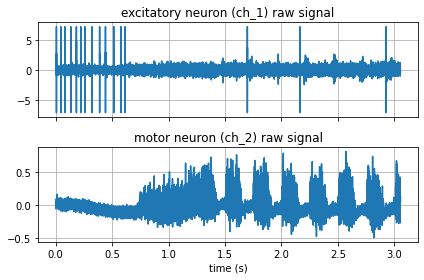

In [46]:
# Pass the loaded data into a pandas Dataframe in order to see the channels and time of sampling.
data = pd.DataFrame(f, columns=["t", "ch_1", "ch_2"])
# Generate a subplot grid to present the raw data.
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(data['t'], data['ch_1'], )
axs[0].set_title("excitatory neuron (ch_1) raw signal")
axs[0].grid(True)
axs[1].plot(data['t'], data['ch_2'])
axs[1].set_title("motor neuron (ch_2) raw signal")
axs[1].grid(True)
axs[1].set_xlabel("time (s)")
fig.tight_layout()

## Izhikevich module
The *Izhikevich* module provides the tools to correctly simulate an EEG response, based on the Izhikevich equations for neural modeling.

### Izhikevich module contents:
- [NeuronTypes](#neurontypes-class)
- [Neuron](#neuron-class)
- [Neural Network](#network-class)

### NeuronTypes class:
The *NeuronTypes* class provides the information and constants in which the *Neuron* objects will rely to perform their signal computing.

In [2]:
n_constant_types = iz.NeuronTypes.get_range("")
# Some more code to show the NeuronTypes class

### Neuron class:
Info about the *Neuron* class...

In [3]:
# Some code about the Neuron class

### Network class:
Info about the *Network* class...

The input length is 20
The net object contains 20 labeled neurons.


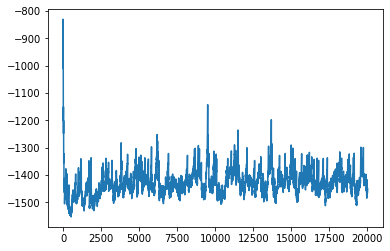

In [4]:
# Create a list of unlabeled Neurons in as parameters for the Network.
neurons_list = [iz.Neuron(-5*n) for n in range(20)]
# Create a Network object containing the unlabeled neurons.
net = iz.Network(neurons_list)
print(f"The net object contains {net.total_neurons} labeled neurons.")
# Run the network for an ammount of 500 ms.
v_field, v_individual, activations = net.activate(500, 0, 0)
plt.figure()
plt.plot(v_field)
plt.show()